In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
import pandas as pd

file_path = "soil_construction_dataset_clean.csv"
df = pd.read_csv(file_path)
numeric_df = df.select_dtypes(include=['number'])  
text_df = df.select_dtypes(include=['object'])  
df.head()

,Sample_ID,Latitude,Longitude,Soil_Type,Moisture_Content,Bulk_Density,Plasticity_Index,Bearing_Capacity,Cohesion,Angle_of_Friction,Groundwater_Level,Seismic_Zone,Flood_Risk,Recommended_Foundation,Suitability_Score
0,1,17.490802,81.615581,Clay,17.565367,1.883444,10.505697,273.692755,36.206726,39.930924,2.570261,III,High,Caisson,62.693098
1,2,29.014286,80.539433,Mixed,10.702705,1.746525,34.917565,185.283338,79.785334,27.721578,5.670364,IV,Low,Strip Footing,25.803372
2,3,24.639879,77.020739,Sandy,27.366059,2.037260,29.512343,132.668849,78.508595,20.039114,1.129395,IV,High,Raft Foundation,0.000000
3,4,21.973170,79.864253,Silt,35.538377,2.090243,32.034320,362.759021,15.813970,32.259341,6.143782,II,Low,Deep Pile,52.818953
4,5,13.120373,77.301933,Sandy,6.683830,1.814357,16.971826,360.284024,72.703198,34.847923,7.831955,II,Medium,Caisson,92.721142


In [23]:
summary = df.describe()
summary 

,Sample_ID,Latitude,Longitude,Moisture_Content,Bulk_Density,Plasticity_Index,Bearing_Capacity,Cohesion,Angle_of_Friction,Groundwater_Level,Suitability_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,19.989765,80.026602,22.447552,1.800240,22.520909,224.968917,55.078123,29.990276,5.244308,33.142371
std,28867.657797,5.766829,5.773834,10.113288,0.230907,10.089807,101.135273,25.977770,5.778095,2.736832,28.813958
min,1.000000,10.000111,70.000096,5.000314,1.400003,5.000950,50.001114,10.002113,20.000126,0.500071,0.000000
25%,25000.750000,14.990921,75.014351,13.663510,1.599409,13.840751,137.203515,32.538002,24.985712,2.886018,4.274747
50%,50000.500000,20.012596,80.037626,22.452022,1.800795,22.487756,225.206673,55.172125,29.985348,5.240579,29.365175
75%,75000.250000,24.990275,85.008226,31.192255,2.000360,31.236250,312.368184,77.555345,35.005225,7.612736,54.397974
max,100000.000000,29.999841,89.999788,39.999976,2.199997,39.999892,399.997809,99.998831,39.999883,9.999866,100.000000


In [24]:
missing_values_count = df.isnull().sum()
missing_values_count

Sample_ID                 0
Latitude                  0
Longitude                 0
Soil_Type                 0
Moisture_Content          0
Bulk_Density              0
Plasticity_Index          0
Bearing_Capacity          0
Cohesion                  0
Angle_of_Friction         0
Groundwater_Level         0
Seismic_Zone              0
Flood_Risk                0
Recommended_Foundation    0
Suitability_Score         0
dtype: int64

Text(0.5, 1.0, 'correlation_matrix')

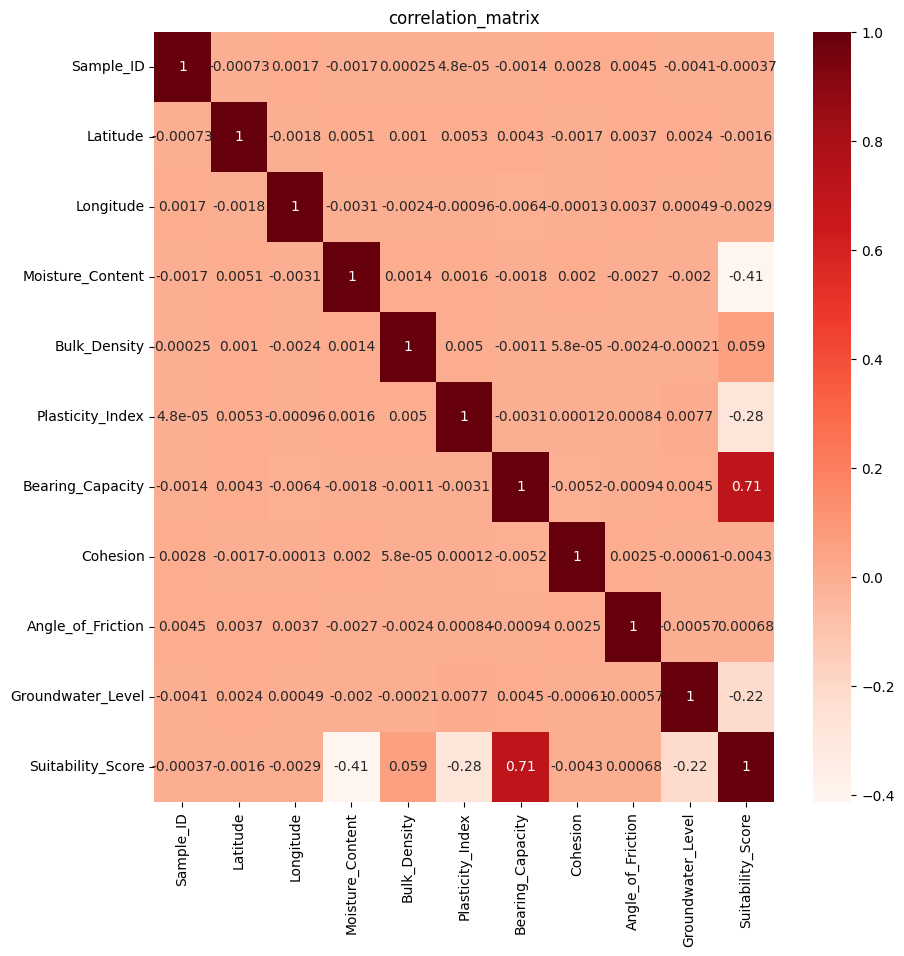

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot = True,cmap=plt.cm.Reds)
plt.title("correlation_matrix")


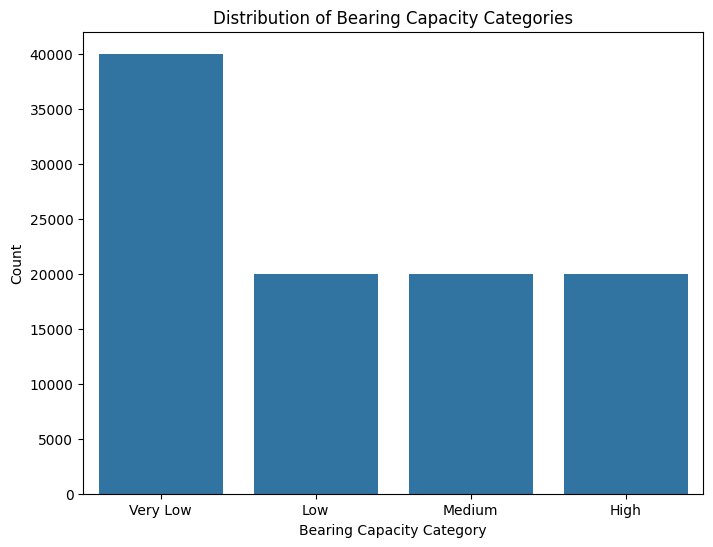

In [26]:
# numeric_df["Suitability_Score"] = pd.qcut(
#     numeric_df["Suitability_Score"], 
#     q=5,  # Divide into 5 bins
#     labels=["Very Low", "Low", "Medium", "High", "Very High"],
#     duplicates="drop"  # Drop duplicate edges
# )
# Compute bin edges using qcut (dropping duplicates)
bins = pd.qcut(numeric_df["Suitability_Score"], q=5, retbins=True, duplicates="drop")[1]

# Generate labels dynamically based on the actual bin count
num_bins = len(bins) - 1
labels = ["Very Low", "Low", "Medium", "High", "Very High"][:num_bins]

# Apply pd.cut instead of qcut to avoid duplicate bin issues
numeric_df["Suitability_Score"] = pd.cut(numeric_df["Suitability_Score"], bins=bins, labels=labels, include_lowest=True)


plt.figure(figsize=(8,6))
sns.countplot(x="Suitability_Score", data=numeric_df)
plt.title("Distribution of Bearing Capacity Categories")
plt.xlabel("Bearing Capacity Category")
plt.ylabel("Count")
plt.show()


In [27]:
from sklearn.model_selection import train_test_split

# Drop target variables from X
x = df.drop(["Recommended_Foundation"], axis=1)

# Select both target columns properly
y = df[["Recommended_Foundation"]]  # Use double brackets [[]] for multiple columns

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print shapes
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((80000, 14), (20000, 14), (80000, 1), (20000, 1))

In [28]:
import pandas as pd

# Define categorical columns properly
categorical_cols = ["Soil_Type", "Seismic_Zone", "Flood_Risk"]

# Check if categorical columns exist before encoding
existing_categoricals = [col for col in categorical_cols if col in x_train.columns]

# Apply One-Hot Encoding only if columns exist
if existing_categoricals:
    x_train = pd.get_dummies(x_train, columns=existing_categoricals, drop_first=True)
    x_test = pd.get_dummies(x_test, columns=existing_categoricals, drop_first=True)
else:
    print("Warning: No categorical columns found in x_train for encoding!")

# If Suitability_Score is categorical and should be encoded, check and process it separately
if "Suitability_Score" in x_train.columns and x_train["Suitability_Score"].dtype == "object":
    x_train["Suitability_Score"] = x_train["Suitability_Score"].astype("category").cat.codes
    x_test["Suitability_Score"] = x_test["Suitability_Score"].astype("category").cat.codes


In [29]:
import pandas as pd

# Identify categorical columns that are still of type 'object'
categorical_cols = x_train.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding if there are categorical columns
if len(categorical_cols) > 0:
    x_train = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
    x_test = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)

# Ensure x_train and x_test have the same columns after encoding
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)


In [30]:
print(x_train.dtypes)  # Check data types of all columns


Sample_ID              int64
Latitude             float64
Longitude            float64
Moisture_Content     float64
Bulk_Density         float64
Plasticity_Index     float64
Bearing_Capacity     float64
Cohesion             float64
Angle_of_Friction    float64
Groundwater_Level    float64
Suitability_Score    float64
Soil_Type_Gravel        bool
Soil_Type_Loam          bool
Soil_Type_Mixed         bool
Soil_Type_Sandy         bool
Soil_Type_Silt          bool
Seismic_Zone_II         bool
Seismic_Zone_III        bool
Seismic_Zone_IV         bool
Seismic_Zone_V          bool
Flood_Risk_Low          bool
Flood_Risk_Medium       bool
dtype: object


In [31]:
print(y_train.dtypes)

Recommended_Foundation    object
dtype: object


In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

# Ensure y_train and y_test are Series before encoding
y_train = encoder.fit_transform(y_train.squeeze())  
y_test = encoder.transform(y_test.squeeze())

# Print to verify encoding
print(y_train[:10])  # Prints first 10 encoded values
print(set(y_train))  # Prints unique encoded labels


[1 1 1 0 1 2 0 2 2 0]
{np.int64(0), np.int64(1), np.int64(2), np.int64(3)}


In [33]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define hyperparameters for tuning
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Use XGBRegressor for continuous target variable (Suitability Score)
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=3, 
    scoring='r2'  # R-squared is better for regression
)

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate model performance
y_pred = grid_search.best_estimator_.predict(x_test)

# Print R-squared score
from sklearn.metrics import r2_score
print("R-squared score:", r2_score(y_test, y_pred))


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
R-squared score: -9.262561798095703e-05


In [34]:
print(x_train.columns)


Index(['Sample_ID', 'Latitude', 'Longitude', 'Moisture_Content',
       'Bulk_Density', 'Plasticity_Index', 'Bearing_Capacity', 'Cohesion',
       'Angle_of_Friction', 'Groundwater_Level', 'Suitability_Score',
       'Soil_Type_Gravel', 'Soil_Type_Loam', 'Soil_Type_Mixed',
       'Soil_Type_Sandy', 'Soil_Type_Silt', 'Seismic_Zone_II',
       'Seismic_Zone_III', 'Seismic_Zone_IV', 'Seismic_Zone_V',
       'Flood_Risk_Low', 'Flood_Risk_Medium'],
      dtype='object')


In [41]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Train the model using XGBRegressor
model = XGBRegressor(random_state=42)
model.fit(x_train, y_train)

# 2. Make predictions
y_pred_train = model.predict(x_train)  # Predictions on training data
y_pred_test = model.predict(x_test)  # Predictions on test data

# 3. Evaluate the model (Training Performance)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# 4. Evaluate the model (Test Performance)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

# 5. Print results
print("\nTraining Performance:")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"R² Score: {train_r2:.4f}")

print("\nTest Performance:")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"R² Score: {test_r2:.4f}")



Training Performance:
Mean Absolute Error (MAE): 0.8827
Mean Squared Error (MSE): 1.0161
R² Score: 0.1861

Test Performance:
Mean Absolute Error (MAE): 1.0040
Mean Squared Error (MSE): 1.2998
R² Score: -0.0399


In [40]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier  # Use classifier instead of regressor

# Paths to required files
MODEL_PATH = "xgboost_model1.json"  # Trained model path
SCALER_PATH = "scaler1.pkl"  # StandardScaler path
ENCODER_PATH = "encoder1.pkl"  # Label encoder path

# Load the training data
file_path = "soil_construction_dataset_clean.csv"
df = pd.read_csv(file_path)

# --- Label Encoding for Target Variable ---
label_encoder = LabelEncoder()
df['Recommended_Foundation'] = label_encoder.fit_transform(df['Recommended_Foundation'])

# Save the encoder for later use
joblib.dump(label_encoder, ENCODER_PATH)

# Select input features
x = df.drop(["Recommended_Foundation"], axis=1)
y = df['Recommended_Foundation']
categorical_cols = ["Soil_Type", "Seismic_Zone", "Flood_Risk"]

# One-hot encoding
x = pd.get_dummies(x, columns=categorical_cols, drop_first=True)

# Train Model (Classification)
model = XGBClassifier(random_state=42)
model.fit(x, y)

# Save the trained model
model.save_model(MODEL_PATH)

# Train and save scaler
scaler1 = StandardScaler()
scaler1.fit(x)
joblib.dump(scaler1, SCALER_PATH)

#soil suggestions
def soil_improvement(foundation_type):
    foundation_type = foundation_type.lower()

    if foundation_type == "strip footing":
        print("\n🔹 **Soil Improvement for Strip Footing:**")
        print("✅ Compaction (Rollers/Rammers)")
        print("✅ Soil Replacement with Gravel/Sand")
        print("✅ Chemical Stabilization (Lime/Cement)")
        print("✅ Electro-Osmosis for Clay Soils")
        print("✅ Soil Nailing for Stability")

        print("\n🌍 **Soil Type:** Sandy or Loamy Soil with Medium Bearing Capacity")

        print("\n🌱 **Plants for Soil Improvement:** Vetiver Grass, Buffalo Grass")

        print("\n⚠ **Symptoms of Poor Soil Conditions:**")
        print("❌ Cracks in Soil Due to Settlement")
        print("❌ Waterlogging and Poor Drainage")
        print("❌ Loose, Unstable Soil that Erodes Easily")

    elif foundation_type == "raft foundation":
        print("\n🔹 **Soil Improvement for Raft Foundation:**")
        print("✅ Preloading with Vertical Drains")
        print("✅ Geotextiles & Geogrids for Reinforcement")
        print("✅ Stone Columns for Load Bearing")
        print("✅ Jet Grouting for Strengthening")
        print("✅ Deep Dynamic Compaction (Heavy Dropping Weights)")

        print("\n🌍 **Soil Type:** Soft Clay, Loose Sand, and Expansive Soil")

        print("\n🌱 **Plants for Soil Improvement:** Alfalfa, Clover, Saltgrass, Bermuda Grass")

        print("\n⚠ **Symptoms of Poor Soil Conditions:**")
        print("❌ Excessive Settlement of Structures")
        print("❌ Soil Expansion and Shrinkage (Causes Cracking)")
        print("❌ Water Seepage and Weak Bearing Capacity")

    elif foundation_type == "deep pile":
        print("\n🔹 **Soil Improvement for Deep Pile Foundation:**")
        print("✅ Grouting (Cement or Chemical) for Soil Strength")
        print("✅ Deep Soil Mixing (Lime/Cement Columns)")
        print("✅ Vacuum Consolidation for Clay Soils")
        print("✅ Micropiles & Geopiers for Load Distribution")
        print("✅ Electrokinetic Stabilization")

        print("\n🌍 **Soil Type:** Weak or Expansive Soils with Low Bearing Capacity")

        print("\n🌱 **Plants for Soil Improvement:** Willow Trees, Bamboo")

        print("\n⚠ **Symptoms of Poor Soil Conditions:**")
        print("❌ High Water Content Leading to Weak Soil")
        print("❌ Uneven Settling of Structures")
        print("❌ Deep Cracks Due to Weak Load-Bearing Capacity")

    elif foundation_type == "caisson foundation":
        print("\n🔹 **Soil Improvement for Caisson Foundation:**")
        print("✅ Stone Columns for Stability")
        print("✅ Underwater Grouting for Marine Structures")
        print("✅ Prefabricated Vertical Drains (PVDs)")
        print("✅ Artificial Island Creation for Stability")
        print("✅ Polymer Injection for Erosion Control")

        print("\n🌍 **Soil Type:** Waterlogged or Marine Clay Soil")

        print("\n🌱 **Plants for Soil Improvement:** Mangroves, Reed Grass, Marsh Plants")

        print("\n⚠ **Symptoms of Poor Soil Conditions:**")
        print("❌ Soil Erosion Due to Water Flow")
        print("❌ Structural Instability in Wet Conditions")
        print("❌ Poor Load-Bearing Capacity for Heavy Structures")

    else:
        print("\n❌ Invalid foundation type. Please choose from:")
        print("   - Strip Footing")
        print("   - Raft Foundation")
        print("   - Deep Pile")
        print("   - Caisson Foundation")


# --- Function to Process Soil Data ---
def process_soil_data(text):
    if text is None:
        return pd.DataFrame()

    data_dict = {}
    for line in text.strip().split("\n"):
        parts = line.split(":")
        if len(parts) == 2:
            key = parts[0].strip()
            value = parts[1].strip()
            try:
                data_dict[key] = float(value)
            except ValueError:
                data_dict[key] = value

    df = pd.DataFrame([data_dict])

    # Ensure all expected columns exist
    expected_columns = [
        'Latitude', 'Longitude', 'Moisture_Content', 'Bulk_Density', 'Plasticity_Index',
        'Bearing_Capacity', 'Cohesion', 'Angle_of_Friction', 'Groundwater_Level',
        'Soil_Type', 'Seismic_Zone', 'Flood_Risk'
    ]
    for col in expected_columns:
        if col not in df.columns:
            df[col] = 0  # Default missing numeric values to 0

    return df

# --- Load Saved Model, Scaler, and Encoder ---
loaded_model = XGBClassifier()
loaded_model.load_model(MODEL_PATH)
loaded_scaler = joblib.load(SCALER_PATH)
loaded_label_encoder = joblib.load(ENCODER_PATH)

# --- Example Soil Report Text ---
soil_report_text = """
Latitude: 27.176670
Longitude: 78.008075
Moisture_Content: 30
Bulk_Density: 1.7
Plasticity_Index: 20
Bearing_Capacity: 120
Cohesion: 0.25
Angle_of_Friction: 25
Groundwater_Level: 2
Soil_Type: Silty Clay
Seismic_Zone: V
Flood_Risk: No
"""


 # Replace with actual input

# --- Process Input Text ---
soil_data = process_soil_data(soil_report_text)

if not soil_data.empty:
    # One-hot encode categorical features
    soil_data_encoded = pd.get_dummies(soil_data, columns=categorical_cols, drop_first=True)

    # Fix column mismatch before scaling
    expected_columns = loaded_scaler.feature_names_in_
    soil_data_encoded = soil_data_encoded.reindex(columns=expected_columns, fill_value=0)

    # Convert all columns to numeric before scaling
    soil_data_encoded = soil_data_encoded.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Scale the data
    soil_data_scaled = loaded_scaler.transform(soil_data_encoded)

    # Make predictions
    foundation_prediction = loaded_model.predict(soil_data_scaled)[0]  # Access first prediction

    # Reverse label encoding to get actual foundation recommendation
    predicted_foundation = loaded_label_encoder.inverse_transform([foundation_prediction])[0]
    
    print(f"Recommended Foundation: {predicted_foundation}")
    # Example Usage
    foundation = predicted_foundation
    soil_improvement(foundation)

    

else:
    print("Error: Could not process soil data from text input.")


Recommended Foundation: Raft Foundation

🔹 **Soil Improvement for Raft Foundation:**
✅ Preloading with Vertical Drains
✅ Geotextiles & Geogrids for Reinforcement
✅ Stone Columns for Load Bearing
✅ Jet Grouting for Strengthening
✅ Deep Dynamic Compaction (Heavy Dropping Weights)

🌍 **Soil Type:** Soft Clay, Loose Sand, and Expansive Soil

🌱 **Plants for Soil Improvement:** Alfalfa, Clover, Saltgrass, Bermuda Grass

⚠ **Symptoms of Poor Soil Conditions:**
❌ Excessive Settlement of Structures
❌ Soil Expansion and Shrinkage (Causes Cracking)
❌ Water Seepage and Weak Bearing Capacity


In [37]:
unique_foundations = df['Recommended_Foundation'].unique()

print("Unique recommended foundations:", unique_foundations)

Unique recommended foundations: [0 3 2 1]
